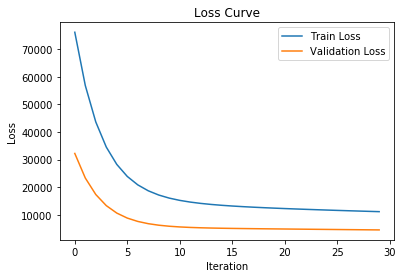

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import numpy as np

#读取数据
mem = Memory("./mycache")
@mem.cache
def get_data():
    data = load_svmlight_file("F:/大三上/机器学习/实验一/housing_scale.txt")
    return data[0], data[1]
X,y= get_data()
X = X.toarray()

#切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#初始化
param = np.zeros(X_train.shape[1])
 
#选择Loss函数及对其求导
def L(X,y,param):
     return (( y - np.dot(X,param) ) ** 2).sum() / 2
def Gra(X,y,param):
     return np.dot(X.T, np.dot(X, param) - y)
    
L_train = []
L_validation = []
learning_rate = 0.00009
num = 30

#求得所有样本对Loss函数的梯度的平均值
for i in range(num):
    G = Gra(X,y,param)
    #更新模型参数
    param = param - learning_rate * G    
    #在训练集上测试并得到Loss函数值
    L_train.append(L(X_train,y_train,param))
    L_validation.append(L(X_test,y_test,param))
#画出随迭代次数的变化图
plt.title('Loss Curve')
plt.plot(range(num),L_train,label="Train Loss")
plt.plot(range(num),L_validation,label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()